In [518]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(451, 3)


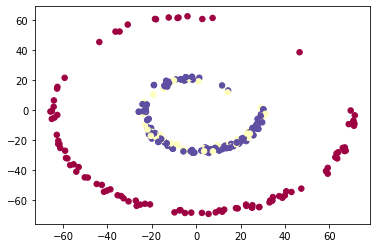

In [519]:
data=np.genfromtxt("traingroup11.csv",delimiter=',',skip_header=1)
print(data.shape)
c0=data[data[:,2]==0.0]
c1=data[data[:,2]==1.0]
c2=data[data[:,2]==2.0]
data2=np.zeros((0,3))
for i in range(451):
    if i%3==0:
        data2=np.append(data2,c0[int(i/3)].reshape(1,3),axis=0)
    elif i&3==1:
        data2=np.append(data2,c1[int(i/3)].reshape(1,3),axis=0)
    else:
        data2=np.append(data2,c2[int(i/3)].reshape(1,3),axis=0)
data1=data2[301:,:]
data=data2[0:300,:]
X_train = data[:, :2]
Y_train = data[:, 2]
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train, s=30, cmap=plt.cm.Spectral);
expected_out=Y_train
Y_train.shape


l1_nodes=8
l2_nodes=5

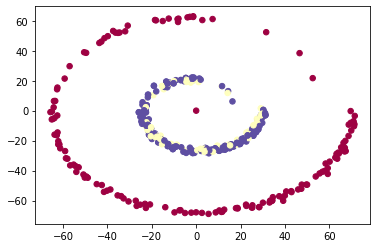

In [520]:
plt.scatter(data2[:,0],data2[:,1], c=data2[:,2], s=30, cmap=plt.cm.Spectral);

In [521]:
X_val = data1[:, :2]
Y_val = data1[:, 2]
expected_out1=Y_val

In [522]:
X_train=X_train.T
Y_train=Y_train.T
Y_train.shape
a=Y_train
def one_hot(Y,C):
    Y=np.eye(C)[Y.reshape(-1)].T
    return Y

Y_train=Y_train.astype(int)


In [523]:
b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train=b


In [524]:
def relu(X):
   return np.maximum(0,X)
import math

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [525]:
def initparameters():
  
    
  
    W1 = np.random.randn(l1_nodes,2) * np.sqrt(2/l1_nodes)
    b1 = np.zeros(shape=(l1_nodes, 1))
    W2 = np.random.randn(l2_nodes, l1_nodes) * np.sqrt(2/l2_nodes)
    b2 = np.zeros(shape=(l2_nodes, 1))
    W3 = np.random.randn(3, l2_nodes) * np.sqrt(2/3)
    b3 = np.zeros(shape=(3, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [526]:
# GRADED FUNCTION: compute_cost

def compute_cost(A3, Y, parameters):
    
    
    m=300
    
    logprobs = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(logprobs) / m
    
    return cost

In [527]:
def backward_propagation(parameters, cache, X, Y):
   
    m=300 
   
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
        
    
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    
    
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3
            }
    
    return grads

In [528]:

def update_parameters(parameters, grads, learning_rate = 0.005):
    
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = velocity['vW1']
    db1 = velocity['vb1']
    dW2 = velocity['vW2']
    db2 = velocity['vb2']
    dW3 = velocity['vW3']
    db3 = velocity['vb3']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                 }
    
    return parameters

In [529]:


# GRADED FUNCTION: nn_model

def nn_model(X, Y,  num_iterations = 10000, print_cost=False):
   
    
   
    parameters =initparameters()
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    costs=[]
    velocity = {"vW1": np.zeros_like(parameters['W1']),
                 "vb1": np.zeros_like(parameters['b1']),
                 "vW2": np.zeros_like(parameters['W2']),
                 "vb2": np.zeros_like(parameters['b2']),
                 "vW3": np.zeros_like(parameters['W3']),
                 "vb3": np.zeros_like(parameters['b3'])
                }
    
    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A3,cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3,Y,parameters)
        if i % 100 == 0:
            costs.append(cost)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        velocity['vW1'] = beta * velocity['vW1'] + (1 - beta) * grads['dW1']
        velocity['vb1'] = beta * velocity['vb1'] + (1 - beta) * grads['db1']
        velocity['vW2'] = beta * velocity['vW2'] + (1 - beta) * grads['dW2']
        velocity['vb2'] = beta * velocity['vb2'] + (1 - beta) * grads['db2']
        velocity['vW3'] = beta * velocity['vW3'] + (1 - beta) * grads['dW3']
        velocity['vb3'] = beta * velocity['vb3'] + (1 - beta) * grads['db3']
        parameters = update_parameters(parameters, grads)
        if(i%1000==0):
            print("cost ",cost)
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        
            
    return parameters,costs
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
   
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "A3": A3,
             "Z3 ":Z3}
    
    return A3, cache


In [530]:
Y_train=Y_train.T
Y_train.shape
X_train.shape

(2, 300)

In [531]:
parameters,costs = nn_model(X_train, Y_train,  num_iterations = 80000, print_cost=True)

cost  2.8001090018271473
cost  1.801826655970079
cost  1.7774389227162373
cost  1.7660479069219093
cost  1.7573683349774258
cost  1.749001376569767
cost  1.741156521396353
cost  1.7341035195378185
cost  1.7225601073506247
cost  1.712700187920866
cost  1.6277558039228373
cost  1.4134687027946693
cost  1.6708376227647155
cost  1.1971190640152842
cost  1.2401393387292257
cost  0.9964295996738247
cost  0.9428204599374843
cost  0.9097777565113002
cost  0.8882980394247253
cost  0.8724083484422155
cost  0.8628571069265699
cost  0.918062819305657
cost  0.9076842905618406
cost  0.8554470681781345
cost  0.8326394012175378
cost  0.8188172881843896
cost  0.7949775396768024
cost  0.785218884234222
cost  0.7797310682658789
cost  0.7755914638363671
cost  0.7720523007041805
cost  0.7679857373039221
cost  0.7655000902711678
cost  0.7633201188618176
cost  0.7613684424621655
cost  0.7596005770103224
cost  0.7579860074787353
cost  0.7565020541802102
cost  0.7551308620207254
cost  0.7538578393543651
cost  

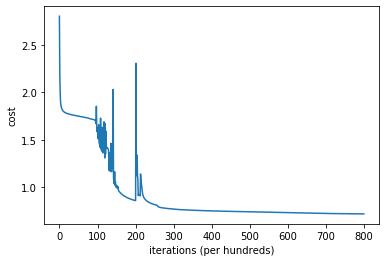

In [532]:

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')

plt.show()


In [533]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2,axis=0)
    ### END CODE HERE ###
    
    return predictions


In [534]:
pred=predict(parameters, X_train)
count=0
count1=0
pred1=predict(parameters,X_val.T)
i=0
j=0
while i<300:
    if(pred[i]==expected_out[i]):
        count=count+1
    i=i+1
while j<150:
    if(pred1[j]==expected_out1[j]):
        count1=count1+1
    j=j+1
print("train accuracy =",count/301)
print("test accuracy =",count1/150)

train accuracy = 0.8372093023255814
test accuracy = 0.7933333333333333


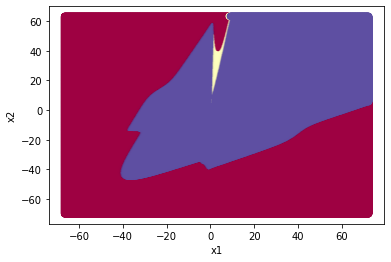

In [461]:

def plot_decision_boundary(parameters, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = (np.c_[xx.ravel(), yy.ravel()])
    Z = (np.c_[xx.ravel(), yy.ravel()])
    pred=predict(parameters, Z.T)
    pred=pred.reshape(xx.shape)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
plot_decision_boundary(parameters, X_train, Y_train)   

In [158]:
X_train=X_train.T

In [159]:
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

In [160]:
def last_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x3[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def first_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x1[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def second_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x2[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
          

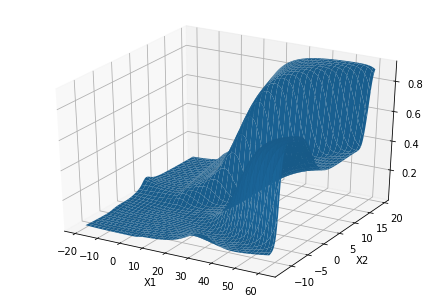

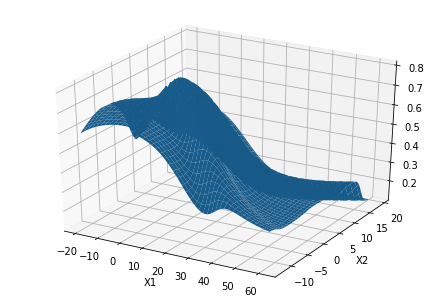

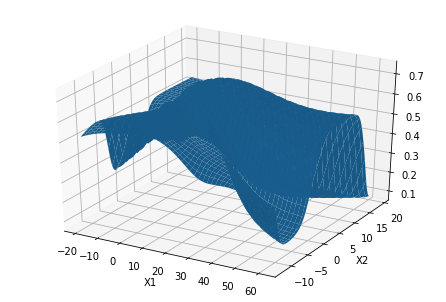

In [161]:
#10000
last_layer(0)
last_layer(1)
last_layer(2)

In [ ]:
plt.show()

In [ ]:
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(3)
first_layer(4)
first_layer(5)


In [ ]:
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(3)
second_layer(4)



In [ ]:
#5000 iterations
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(4)
first_layer(5)
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(4)
last_layer(0)
last_layer(1)
last_layer(2)

In [ ]:
# 1 iteration
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(4)
first_layer(5)
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(4)
last_layer(0)
last_layer(1)
last_layer(2)